**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

**Loading data**

In [3]:
# downloading dataset from kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 99% 424M/428M [00:03<00:00, 161MB/s]
100% 428M/428M [00:03<00:00, 148MB/s]


In [4]:
!unzip /content/toronto-emotional-speech-set-tess.zip -d /content/tessdata/

Streaming output truncated to the last 5000 lines.
  inflating: /content/tessdata/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: /content/tessdata/TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: /content/tessdata/TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: /content/tessdata/TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: /content/tessdata/TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: /content/tessdata/TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: /content/tessdata/TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: /content/tessdata/TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: /content/tessdata/TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: /content/tessdata/TESS Toront

In [5]:
!mv '/content/tessdata/TESS Toronto emotional speech set data/YAF_pleasant_surprised' '/content/tessdata/TESS Toronto emotional speech set data/surprise'


In [6]:
dir_path = '/content/tessdata/TESS Toronto emotional speech set data'
lst = os.listdir(dir_path)
lst

['OAF_angry',
 'YAF_neutral',
 'OAF_disgust',
 'YAF_sad',
 'OAF_neutral',
 'OAF_Pleasant_surprise',
 'YAF_happy',
 'OAF_Fear',
 'YAF_disgust',
 'YAF_angry',
 'surprise',
 'OAF_Sad',
 'YAF_fear',
 'OAF_happy']

In [7]:
def load_data(dir_path):
  path, labels = [], []
  for label in os.listdir(dir_path):
    for file in os.listdir(os.path.join(dir_path, label)):
      path.append(os.path.join(dir_path, label, file))
      labels.append(label.split('_')[-1].lower())
  return path, labels

In [8]:
path, labels = load_data(dir_path)
print(set(labels))

{'surprise', 'angry', 'neutral', 'fear', 'sad', 'disgust', 'happy'}


In [10]:
df = pd.DataFrame()
df['path'] = path
df['label'] = labels
df.sample(10)

,path,label
421,/content/tessdata/TESS Toronto emotional speec...,disgust
2204,/content/tessdata/TESS Toronto emotional speec...,sad
1286,/content/tessdata/TESS Toronto emotional speec...,happy
2249,/content/tessdata/TESS Toronto emotional speec...,sad
102,/content/tessdata/TESS Toronto emotional speec...,angry
2019,/content/tessdata/TESS Toronto emotional speec...,surprise
774,/content/tessdata/TESS Toronto emotional speec...,sad
2465,/content/tessdata/TESS Toronto emotional speec...,fear
1387,/content/tessdata/TESS Toronto emotional speec...,happy
2438,/content/tessdata/TESS Toronto emotional speec...,fear


In [11]:
df['label'].value_counts()

,count
label,
angry,400
neutral,400
disgust,400
sad,400
surprise,400
happy,400
fear,400


In [12]:
# number of output labels
n_labels = len(df['label'].unique())
n_labels

7

**Data analysis**

<Axes: ylabel='count'>

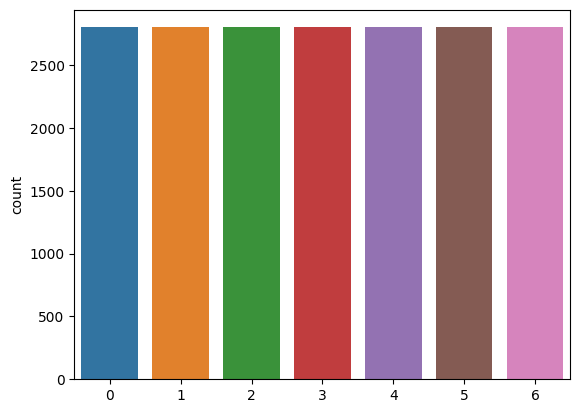

In [13]:
#Graphical Representation
le = LabelEncoder()
labels_encoded = to_categorical(le.fit_transform(labels))
sns.countplot(data=labels_encoded)

In [14]:
labels_encoded.shape

(2800, 7)

In [15]:

def waveplot(data, sr, emotion): #showing waveplot
  plt.figure(figsize=(10, 4))
  plt.title(emotion + " waveplot", size=20)
  librosa.display.waveshow(data, sr=sr)
  plt.show()

def spectogram(data, sr, emotion): #showing spectogram
  x = librosa.stft(data)
  xdb=librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(11,4))
  plt.title(emotion + " spectogram",size=20 )
  librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
  plt.colorbar()


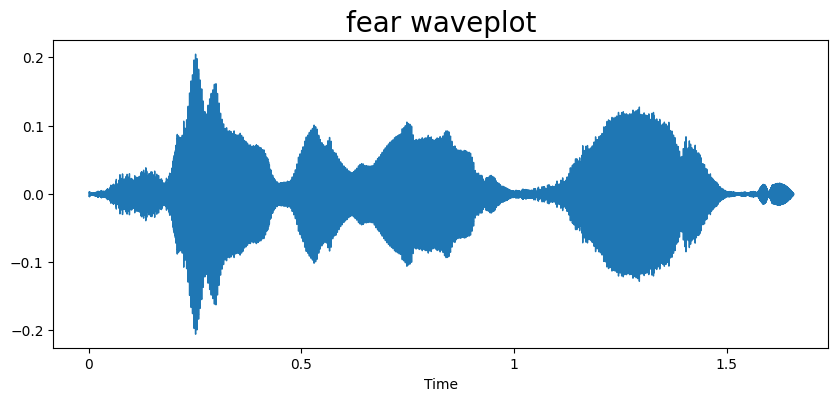

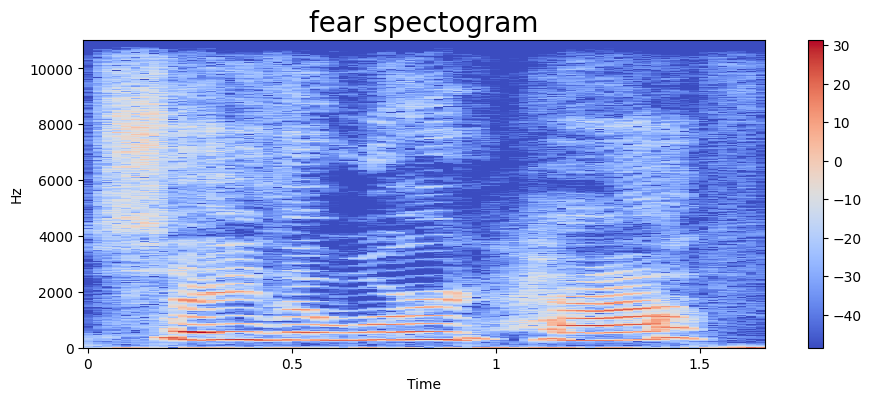

In [16]:
emotion='fear'
file_path=np.array(df['path'][df['label']==emotion])[0]
signal, sr = librosa.load(file_path)
waveplot(signal, sr, emotion)
spectogram(signal, sr, emotion)
Audio(file_path) #PLAY

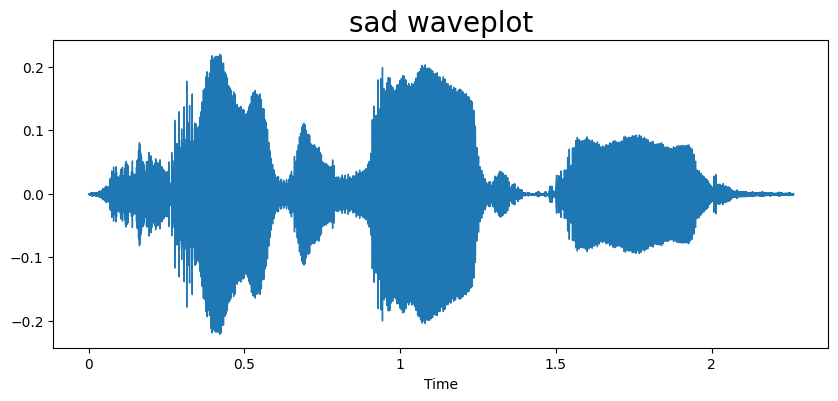

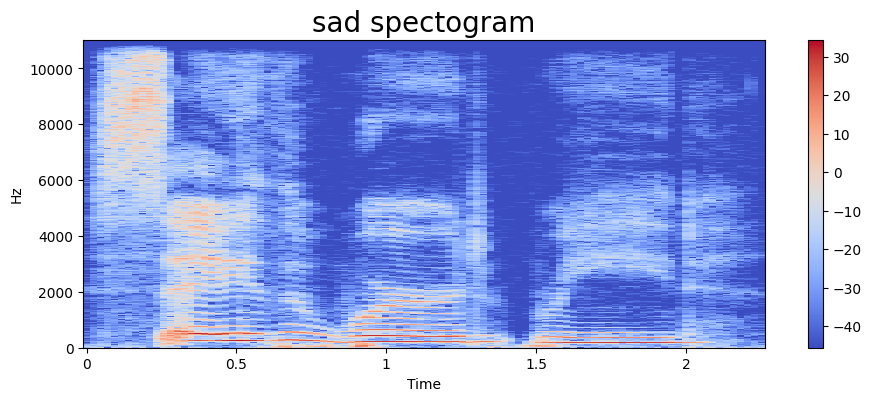

In [17]:
emotion='sad'
file_path=np.array(df['path'][df['label']==emotion])[0]
signal, sr = librosa.load(file_path)
waveplot(signal, sr, emotion)
spectogram(signal, sr, emotion)
Audio(file_path)

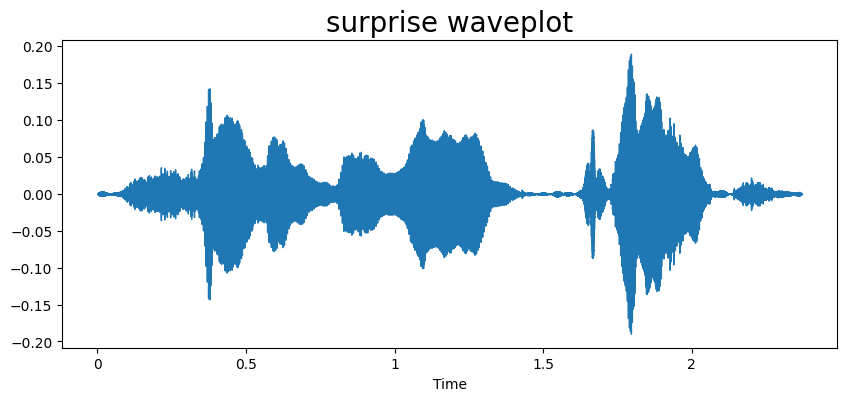

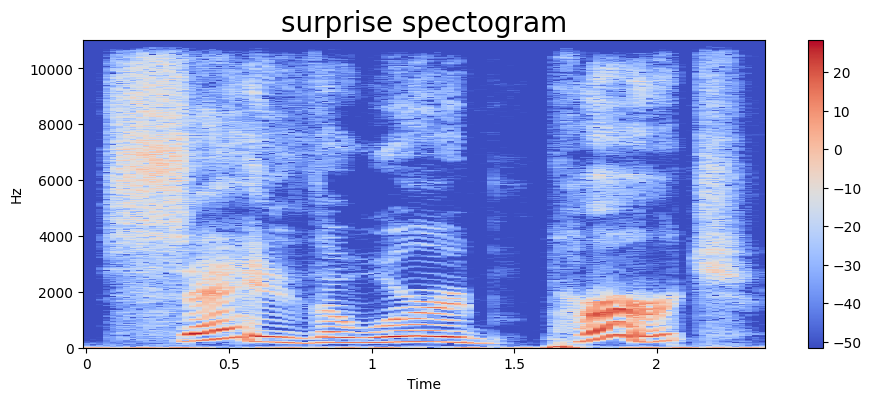

In [18]:
emotion='surprise'
file_path=np.array(df['path'][df['label']==emotion])[0]
signal, sr = librosa.load(file_path)
waveplot(signal, sr, emotion)
spectogram(signal, sr, emotion)
Audio(file_path)

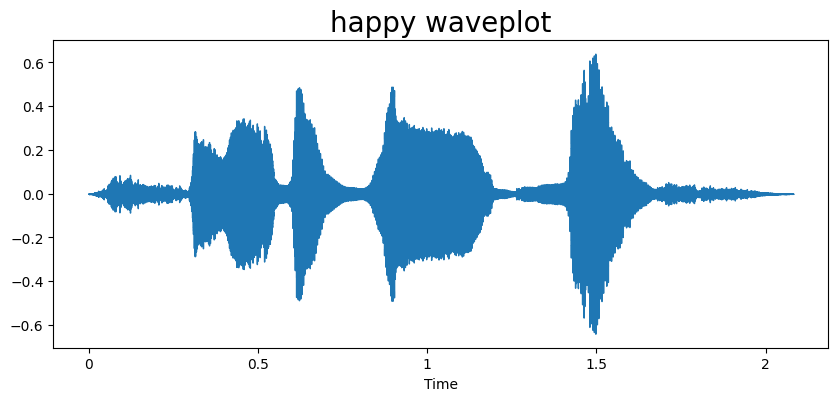

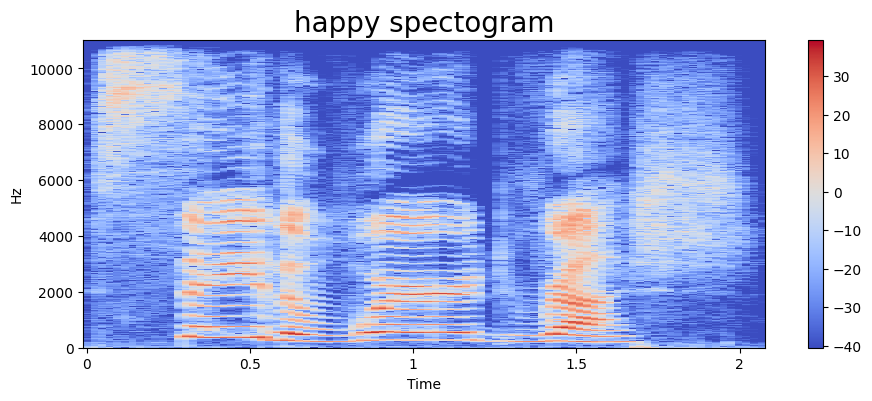

In [19]:
emotion='happy'
file_path=np.array(df['path'][df['label']==emotion])[0]
signal, sr = librosa.load(file_path)
waveplot(signal, sr, emotion)
spectogram(signal, sr, emotion)
Audio(file_path)

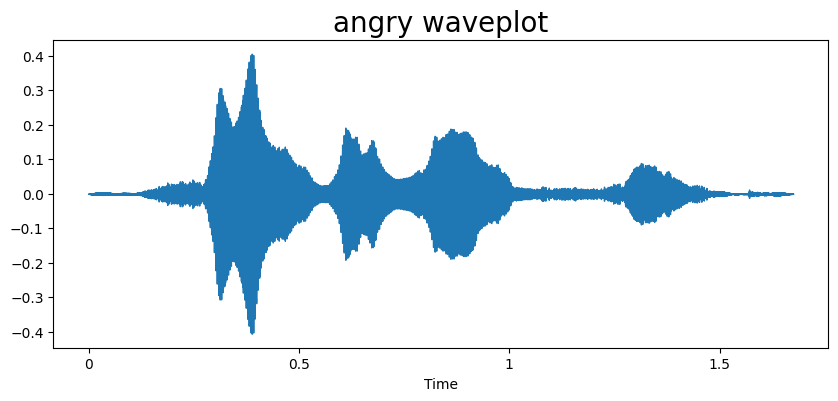

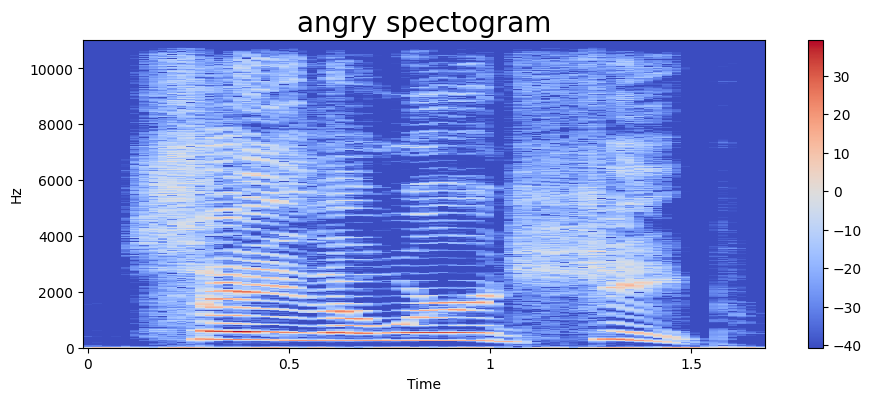

In [20]:
emotion='angry'
file_path=np.array(df['path'][df['label']==emotion])[0]
signal, sr = librosa.load(file_path)
waveplot(signal, sr, emotion)
spectogram(signal, sr, emotion)
Audio(file_path)

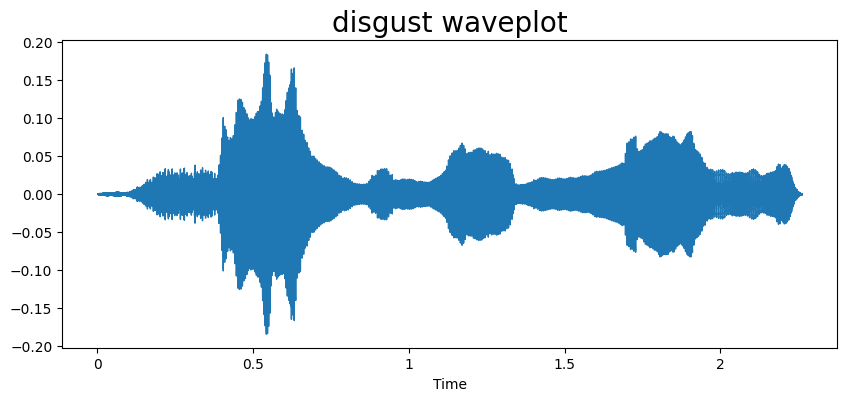

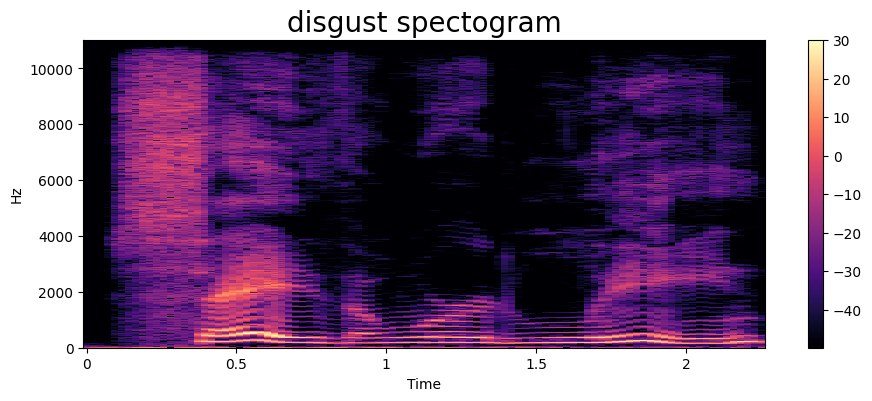

In [21]:
emotion='disgust'
file_path=np.array(df['path'][df['label']==emotion])[0]
signal, sr = librosa.load(file_path)
waveplot(signal, sr, emotion)
spectogram(signal, sr, emotion)
Audio(file_path)

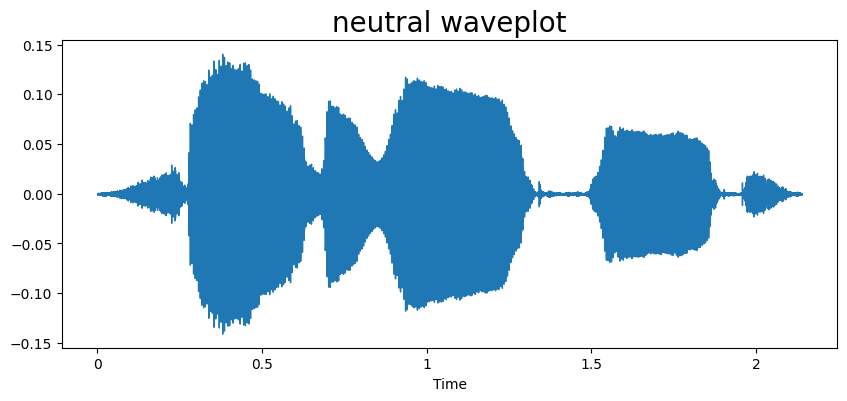

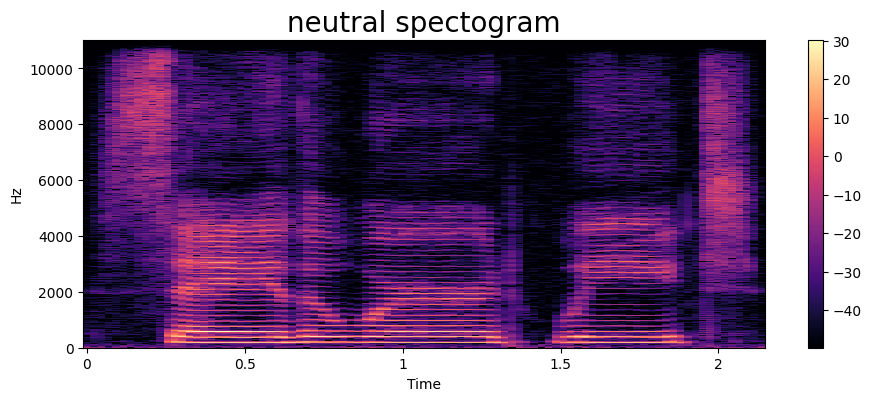

In [22]:
emotion='neutral'
file_path=np.array(df['path'][df['label']==emotion])[0]
signal, sr = librosa.load(file_path)
waveplot(signal, sr, emotion)
spectogram(signal, sr, emotion)
Audio(file_path)

**Feature Extraction (help to fetch features from audio)**

In [23]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename,duration=3,offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [24]:
X_mfcc=df['path'].apply(lambda x: extract_mfcc(x))

In [26]:
X=np.array(X_mfcc.tolist())
X.shape

(2800, 40)

In [27]:
X=np.expand_dims(X,-1)
print(X.dtype)
X.shape

float32


(2800, 40, 1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, labels_encoded, test_size=0.2, random_state=42)

In [29]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

In [30]:
# Construct  Architecture
model = Sequential()
model.add(LSTM(150))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(X_train, y_train, epochs=30, batch_size=10, validation_split=0.2)  #training the model
model.save('speech_recog_model.keras')

Epoch 1/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.9889 - loss: 0.0486 - val_accuracy: 0.9978 - val_loss: 0.0126
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9957 - loss: 0.0150 - val_accuracy: 0.9732 - val_loss: 0.1060
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9777 - loss: 0.0734 - val_accuracy: 0.9844 - val_loss: 0.0495
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.9965 - loss: 0.0109 - val_accuracy: 0.9799 - val_loss: 0.0456
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9923 - loss: 0.0182 - val_accuracy: 0.9844 - val_loss: 0.0614
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9836 - loss: 0.0442 - val_accuracy: 0.9866 - val_loss: 0.0433
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9863 - loss: 0.0567 - val_accuracy: 0.9911 - val_loss: 0.0309
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.9882 - loss: 0.0445 - val_a

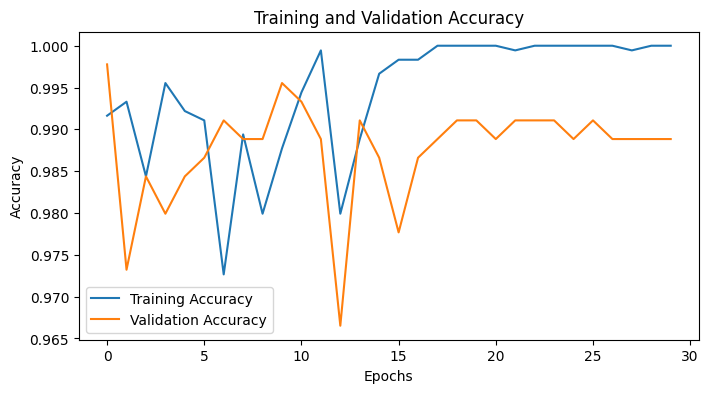

In [33]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

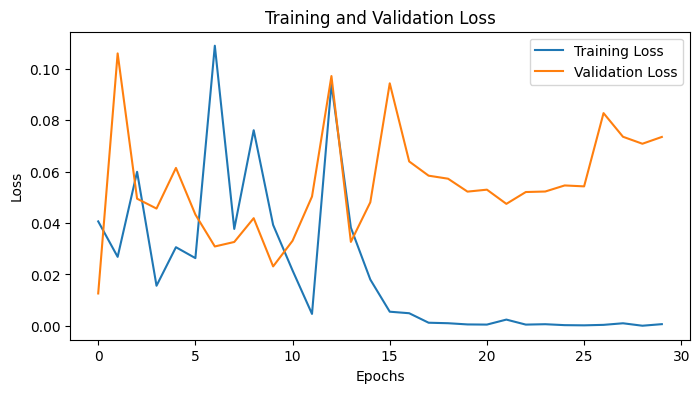

In [34]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

**Model prediction**

In [35]:
print(X_test.shape)
print(X_train.shape)

(560, 40, 1)
(2240, 40, 1)


In [36]:
X_test = X_test.reshape(-1, 40, 1)
pred_y = model.predict(X_test)
pred_y.shape

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


(560, 7)

In [37]:
pred_y = np.argmax(pred_y, axis = 1)
test_y = np.argmax(y_test, axis = 1)

In [38]:
AS = accuracy_score(pred_y, test_y)

print("Accuracy Score --> ", AS)
print("\n")
print("Accuracy Score as Percentage -->  ", AS * 100,"%")

Accuracy Score -->  0.9875


Accuracy Score as Percentage -->   98.75 %


**Confusion matrix**

In [39]:
# Confusion Matrix
Conf_Matrix = confusion_matrix(pred_y, test_y)
print("Confusion Matrix:\n", Conf_Matrix)

Confusion Matrix:
 [[72  0  0  0  0  0  0]
 [ 0 90  0  0  0  0  0]
 [ 0  0 76  0  0  0  0]
 [ 0  0  1 81  0  0  2]
 [ 0  0  0  0 69  0  0]
 [ 0  0  0  0  0 80  0]
 [ 2  1  0  1  0  0 85]]


Text(0.5, 1.0, 'Confusion Matrix')

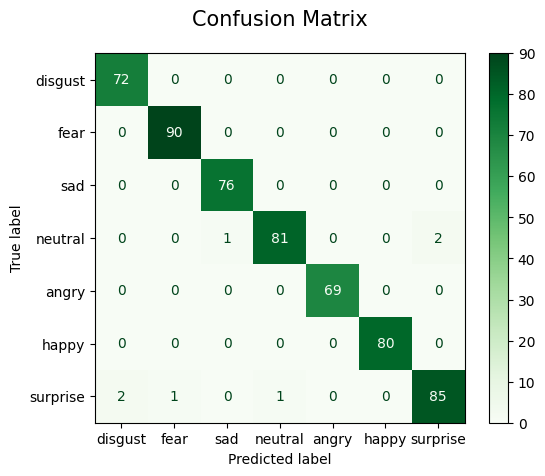

In [40]:
#{'disgust', 'fear', 'sad', 'neutral', 'angry', 'happy', 'surprise'}
target_names = ['disgust', 'fear', 'sad', 'neutral', 'angry', 'happy', 'surprise']
disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix , display_labels=target_names)
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix', fontsize=15, pad=20)

**Classification Report**

In [41]:
Target_Emotions = ['disgust', 'fear', 'sad', 'neutral', 'angry', 'happy', 'surprise']

CR = classification_report(pred_y, test_y, target_names = Target_Emotions)

print("Classification Report:\n", CR)

Classification Report:
               precision    recall  f1-score   support

     disgust       0.97      1.00      0.99        72
        fear       0.99      1.00      0.99        90
         sad       0.99      1.00      0.99        76
     neutral       0.99      0.96      0.98        84
       angry       1.00      1.00      1.00        69
       happy       1.00      1.00      1.00        80
    surprise       0.98      0.96      0.97        89

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560

